# Trabalho 6 - Transformada de Fourier e realce no domínio da frequência


## Preâmbulo

Série de Fourier é uma série trigonométrica usada para representar funções infinitas e periódicas complexas de processos físicos como funções trigonométricas simples de senos e cossenos.
Simplificando assim a visualização e manipulação das funções.
Foi criada por Jean Baptiste Joseph Fourier (1768-1830) em 1807.

A forma geral da série é:

$$
T(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty}
[
a_n \cos{\frac{k \pi x}{L}}
+ b_n \sin{\frac{k \pi x}{L}}
]
$$

Onde:

$$
a_0 = \frac{1}{L} \int_c^{c+2L} f(x)dx
$$

$$
a_k = \frac{1}{L} \int_c^{c+2L} f(x)\cos{\frac{k \pi x}{L}} dx
$$

$$
b_k = \frac{1}{L} \int_c^{c+2L} f(x)\sin{\frac{k \pi x}{L}} dx
$$

A série de Fourier é uma importante técnica de compactação digital, por exemplo para ver imagens on-line, reproduzir músicas digitais, no cancelamento de ruídos.

Levando em consideração a função triangular abaixo:

![Função triangular](GraficoFuncaoTriangular.png)

Temos a série de Fourier que a representa:

![Função triangular série de fourier](triangularFuncao.png)

## Código

O código, apresentado a seguir, é separado nos métodos:
* fourier_series - Calcula o valor da série de Fourier para um determinado ponto;
* draw_fourier_series - Desenha o gráfico da série de fourier para um determinado número de senos;
* fourier_magniture - Desenha o gráfico da magnitude da série de fourier.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")


def fourier_series(n_max, x):
    def bk(k):
        return 1 / ((2 * k - 1) ** 2)

    def wk(k):
        return (2 * k - 1) * np.pi

    resp = 0
    for n in range(0, n_max):
        resp += bk(n) * np.sin(wk(n) * x)
    return .5 - (4 / (np.pi ** 2)) * resp


def draw_fourier_series(armonics):
    x = np.linspace(-4, 4, 1000)
    f = np.array([fourier_series(armonics, i) for i in x])

    plt.plot(x, f, color="red", label="Série de Fourier")
    plt.title(f"Série de Fourier com {armonics} senos")
    plt.legend()
    plt.show()

def fourier_magniture(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
    plt.show()

## Resultados

Primeiramente é desenhado o gráfico da série de Fourier usando apenas um seno como aproximação.

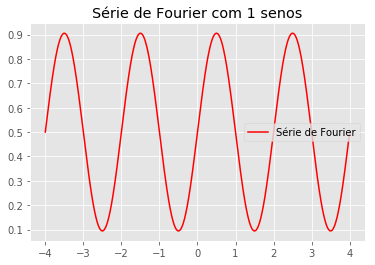

In [2]:
draw_fourier_series(1)

Conforme pode ser visto, na imagem acima, a função apresenta algumas diferenças significativas, tomando como exemplo os ponstos $x=1$, $x=2$ e $x=3$ podemos ver que os valores estão um pouco distantes do esperado na figura original

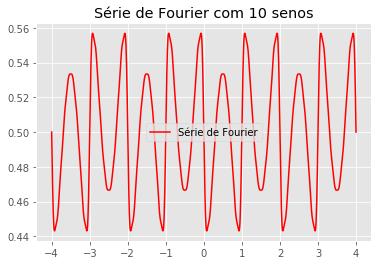

In [3]:
draw_fourier_series(10)

Conforme pode-se ver acima, ao aumentar o número de senos para 10 aumenta o número de oscilações da função contudo os valores nos pontos $x=1$, $x=2$ e $x=3$ aproximam-se muito mais do esperado.

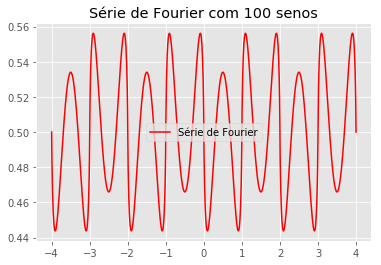

In [4]:
draw_fourier_series(100)

Aumentando o número para 100 senos vemos que, aparentemente não houve grande alteração no gráfico dos valores encontrados para a Série de Fourier.

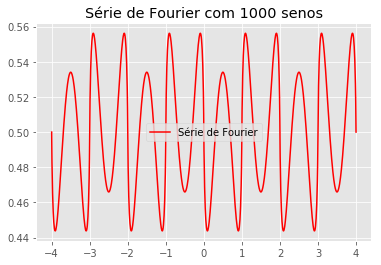

In [5]:
draw_fourier_series(1000)

Aumentando para 1000 senos vemos que o gráfico não apresenta grandes alterações, o que não justifica repetir o processo aumentando muito o número de senos além dos valores já analisados.

Agora fazendo o cálculo do módulo da transformada de Fourier e desenhando o gráfico do mesmo.

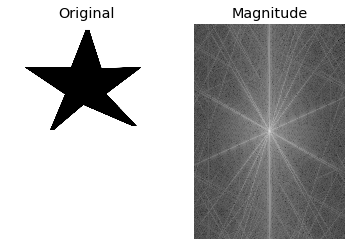

In [12]:
estrela_topo = cv2.imread('estrelaTopo.png', 0)
fourier_magniture(estrela_topo)

Primeiramente é apresentado o gráfico da magniture da transformada de Fourier para a imagem com a estrela no topo do arquivo.

Em seguida é executado o mesmo cálculo mas desta vez efetuando-se uma translação na estrela da primeira figura.

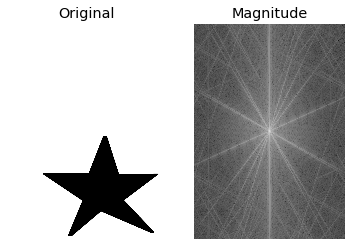

In [13]:
estrela_fundo = cv2.imread('estrelaFundo.png', 0)
fourier_magniture(estrela_fundo)

Conforme podemos ver nas imagens acima, a magnitude da transformada de Fourier não é afetada por uma operação de translação na imagem.

Agora comprovamos visualmente a propriedade com a subtração das imagens.

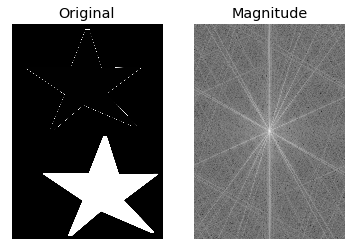

In [14]:
fourier_magniture(estrela_topo - estrela_fundo)

## Discussão

Conforme analisado nos resultados, podemos ver como uma aproximação de uma série de Fourier pode ser utilizada para obter os valores de um fenômeno complexo.

Ao analisar também o resultado do cálculo da magnitude da transformada de Fourier foi possível perceber, empíricamente, que este não sofre influência por uma operação de translação na imagem.